## Module 3: Exploratory data analysis  

### Lesson 4: Enhancing data visualizations
- We have seen several ways of plotting graphs to depict data and analyses visually.
- In this lesson, we will look at enhancing our plots for better story telling.

### Part 3.4.1  : Making better visuals - Part I

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data
pos_data = pd.read_csv('POS_CleanData.csv')
pos_data.head()   

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0


#### Comparison of revenue among all the segments wherever revenue was not zero

In [3]:
df_NonZeroRev = pos_data.loc[pos_data['Revenue($)'] != 0]
df_NonZeroRev.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
5,SKU1019,3/20/2021,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Colgate,8239,864,3543
6,SKU1021,04-09-22,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,25243,1513,5639
7,SKU1044,4/23/2022,Synergix solutions,Oral Care,Toothpaste,Sensitivity Toothpaste,Sensodyne,24707,1509,5161
8,SKU1017,06-11-22,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Colgate,25987,1449,4400
9,SKU1017,7/30/2022,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Colgate,25605,1468,4833


In [4]:
df_NonZeroRev.shape

(19030, 10)

In [5]:
# calculate total revenue by segment
df_NonZeroRev.groupby('Segment').sum(numeric_only = True).drop(['Units_sold', 'Page_traffic'], axis=1)

,Revenue($)
Segment,
Acne,8030417
Alcohol-Free Mouthwash,6455108
Anti-aging,50130741
Breath-Freshening Mouthwash,5615592
Conditioners,14522060
Dryer Sheets,15705592
Electric Toothbrushes,15786214
Fluoride Mouthwash,6378728
Fluoride-Free Toothpaste,9316420


Text(0.5, 1.0, 'Boxplot of revenue by segment')

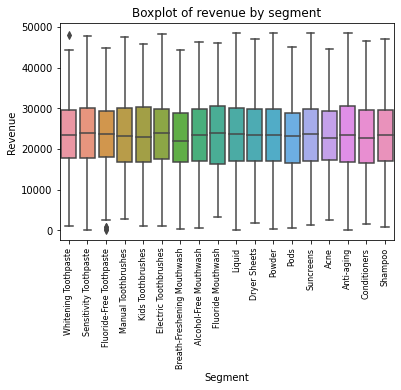

In [6]:
# Create a grouped boxplot showing revenue by segment
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Segment',y = 'Revenue($)',data = df_NonZeroRev)
# Rotate x-axis labels
plt.xticks(fontsize = 8,rotation = 90)  # Specify the rotation angle (in degrees)

# Add labels and title
plt.xlabel("Segment")
plt.ylabel("Revenue")
plt.title("Boxplot of revenue by segment")

#### Comparison of page traffic among all the categories

Text(0.5, 1.0, 'Boxplot showing page traffic across categories')

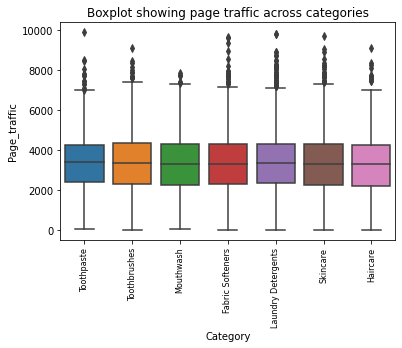

In [7]:
# Create a grouped boxplot
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Category',y = 'Page_traffic',data = df_NonZeroRev)
# Rotate x-axis labels
plt.xticks(fontsize = 8,rotation = 90)  # Specify the rotation angle (in degrees)

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Page_traffic")
plt.title("Boxplot showing page traffic across categories")

### Part 3.4.2  : Making better visuals - Part II

#### Visualize the distribution of revenue among different sectors

In [8]:
# first subset the data according to sector
df_oral = pos_data.loc[pos_data['Sector']=='Oral Care']
df_fabric = pos_data.loc[pos_data['Sector']=='Fabric Care']
df_beauty = pos_data.loc[pos_data['Sector']=='Beauty and Personal Care']

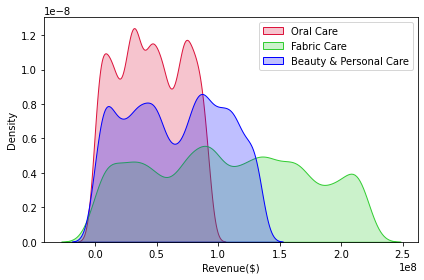

In [9]:
# create a kernel density estimate (KDE) plot for each sector, all on the same graph
fig, ax1 = plt.subplots(figsize=(6, 4))
sns.kdeplot(data = df_oral['Revenue($)'].cumsum(),
            color = 'crimson', label = 'Oral Care', fill = True, ax = ax1)
sns.kdeplot(data = df_fabric['Revenue($)'].cumsum(),
            color = 'limegreen', label = 'Fabric Care', fill = True, ax = ax1)
sns.kdeplot(data = df_beauty['Revenue($)'].cumsum(),
            color = 'blue', label = 'Beauty & Personal Care', fill = True, ax = ax1)
ax1.legend()
plt.tight_layout()
plt.show()

***Inference:***
- The above plot shows the distribution of revenue for all three sectors.
- Fabric Care revenue is distributed from \\$0 to \\$2.5M with almost equal density.
- Oral Care products have high revenue between \\$0 and \\$1M.
- Beauty & Personal care products have revenue between \\$0 and|\\$1.5M. 

#### Display the quantile distribution of page traffic versus revenue
- First find the values of Q1, Q2 and Q3 for page traffic
- Then create a scatter plot of page traffic versus revenue with different colors for the points in different quartiles.

In [10]:
pos_data['Page_traffic'].describe()

count    31057.000000
mean      2051.972051
std       1978.479920
min          0.000000
25%          0.000000
50%       1960.000000
75%       3646.000000
max      10696.000000
Name: Page_traffic, dtype: float64

**We can see that min value and Q1 both are zero. So, let's plot from Q2 onwards.**

In [11]:
# define different colors according to quartile values
colors = np.where(pos_data['Page_traffic'] <= 1960,'red',\
                  np.where(pos_data['Page_traffic'] <= 3646,'blue','green'))

In [12]:
colors

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U5')

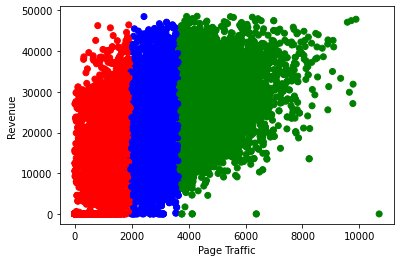

In [13]:
# a scatter plot with point colored according to quartile values
plt.figure(figsize=(6, 4))
plt.scatter(x = pos_data['Page_traffic'], y = pos_data['Revenue($)'], c = colors)
plt.xlabel("Page Traffic")
plt.ylabel("Revenue")
plt.show()

***Explanation:***
- Using the numpy method `where()`, we define a nested condition to specify three different colors for page traffic.
- When page traffic is less than or equal to 1960 (Q2 or median), we use red, for the page traffic between 1960 and 3646 (Q3), we choose blue, and for all the values above Q3, we use green.

### Part 3.4.3  : Making better visuals - Part III

#### Stacked bar plot
- A stacked bar plot is a type of bar plot where multiple bars are stacked on top of each other within each category, showing how different parts contribute to the whole for each category. 
- This is useful when you want to compare the parts of a whole for different categories. 

In [14]:
# Create a pivot table to prepare the data for a stacked bar plot
pivot_table = pos_data.groupby(['Sector', 'Category'])['Revenue($)'].mean().unstack()
pivot_table

Category,Fabric Softeners,Haircare,Laundry Detergents,Mouthwash,Skincare,Toothbrushes,Toothpaste
Sector,,,,,,,
Beauty and Personal Care,NaN,14173.311271,NaN,NaN,14639.892179,NaN,NaN
Fabric Care,14494.723468,NaN,14172.142646,NaN,NaN,NaN,NaN
Oral Care,NaN,NaN,NaN,14607.62312,NaN,14336.548964,14666.361199


<Figure size 360x216 with 0 Axes>

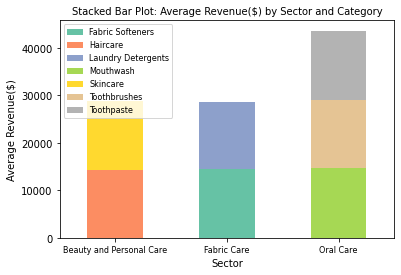

In [15]:
# create the stacked bar plot
plt.figure(figsize = (5, 3))
pivot_table.plot(kind = 'bar', stacked = True, colormap = 'Set2')
plt.xlabel("Sector")
plt.ylabel("Average Revenue($)")
plt.title("Stacked Bar Plot: Average Revenue($) by Sector and Category",fontsize=10)
plt.xticks(fontsize = 8,rotation = 0)

plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

#### Subplots
- When we would like to see more than one graph at a time, we use subplots.
- `plt.subplots()` allows you to create a grid of subplots within a single figure. 
- Subplots are useful when you want to display multiple plots together for comparison or visualization of related data. 
- `plt.subplots()` returns both a figure object and an array of subplot objects that you can use to customize and add plots to.

#### Visualize the distribution of revenue per SKU ID and observe the outliers
- Use the horizontal box plot and the KDE plot to visualize simultaneously
- This type of plots will help us to observe the outliers through box plot as well as on the distribution curve

<Axes: xlabel='Revenue($)', ylabel='Density'>

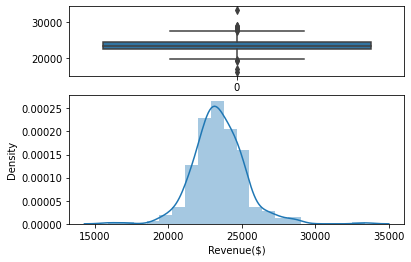

In [16]:
# create a combination boxplot and histogram
f, (ax_box,ax_hist) = plt.subplots(2, gridspec_kw = {'height_ratios': (0.35,0.65)})
df = df_NonZeroRev.groupby('SKU ID').mean(numeric_only = True)
sns.boxplot(df['Revenue($)'], ax = ax_box)
sns.distplot(df['Revenue($)'], ax = ax_hist, kde = True, bins = 20)

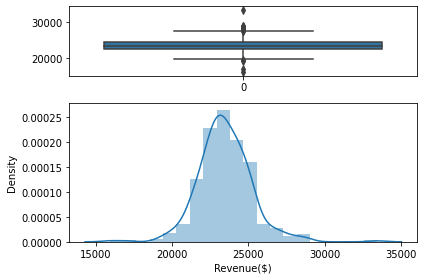

In [17]:
# replot with tight layout
f, (ax_box,ax_hist) = plt.subplots(2, gridspec_kw = {'height_ratios': (0.3,0.6)})
df = df_NonZeroRev.groupby('SKU ID').mean(numeric_only = True)
sns.boxplot(df['Revenue($)'], ax = ax_box)
sns.distplot(df['Revenue($)'], ax = ax_hist, kde = True, bins = 20)
f.tight_layout()

#### Compare the revenue of various categories under 3 sectors

In [18]:
# subset the data according to sector
df_oral = pos_data.loc[pos_data['Sector'] == 'Oral Care']
df_fabric = pos_data.loc[pos_data['Sector'] == 'Fabric Care']
df_beauty = pos_data.loc[pos_data['Sector'] == 'Beauty and Personal Care']

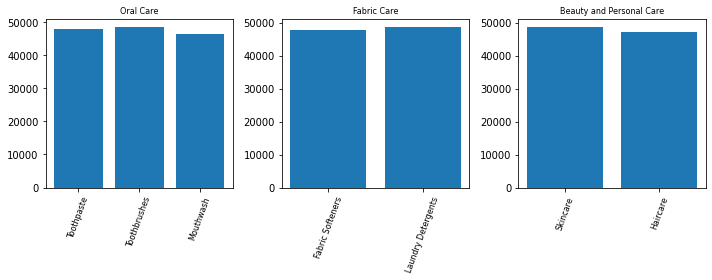

In [19]:
# create bar plots of revenue by category, by sector
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

axes[0].bar(df_oral['Category'],df_oral['Revenue($)'])
axes[0].set_title('Oral Care', fontsize = 8)
Oral_labels = list(df_oral.Category.unique())
axes[0].set_xticklabels(Oral_labels, fontsize = 8,rotation = 70)

axes[1].bar(df_fabric['Category'],df_fabric['Revenue($)'])
axes[1].set_title('Fabric Care', fontsize = 8)
Fabric_labels = list(df_fabric.Category.unique())
axes[1].set_xticklabels(Fabric_labels, fontsize = 8,rotation = 70)

axes[2].bar(df_beauty['Category'],df_beauty['Revenue($)'])
axes[2].set_title('Beauty and Personal Care', fontsize = 8)
Beauty_labels = list(df_beauty.Category.unique())
axes[2].set_xticklabels(Beauty_labels, fontsize = 8,rotation = 70)

# adjust layout so that everything fits in the plot area
plt.tight_layout()

# Show the plots
plt.show()
